In [1]:
import pandas as pd
import numpy as py
diabetes=pd.read_csv('dataset.csv')

In [2]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
label = 'Outcome'
X, y = diabetes[features].values, diabetes[label].values
for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [np.float64(6.0), np.float64(148.0), np.float64(72.0), np.float64(35.0), np.float64(0.0), np.float64(33.6), np.float64(0.627), np.float64(50.0)] 
  Label: 1
Patient 2 
  Features: [np.float64(1.0), np.float64(85.0), np.float64(66.0), np.float64(29.0), np.float64(0.0), np.float64(26.6), np.float64(0.351), np.float64(31.0)] 
  Label: 0
Patient 3 
  Features: [np.float64(8.0), np.float64(183.0), np.float64(64.0), np.float64(0.0), np.float64(0.0), np.float64(23.3), np.float64(0.672), np.float64(32.0)] 
  Label: 1
Patient 4 
  Features: [np.float64(1.0), np.float64(89.0), np.float64(66.0), np.float64(23.0), np.float64(94.0), np.float64(28.1), np.float64(0.167), np.float64(21.0)] 
  Label: 0


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 537
Test cases: 231


In [17]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


In [18]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 0]
Actual labels:     [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 0 0]


In [8]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.7359307359307359


In [19]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [20]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.6172839506172839
Overall Recall: 0.625


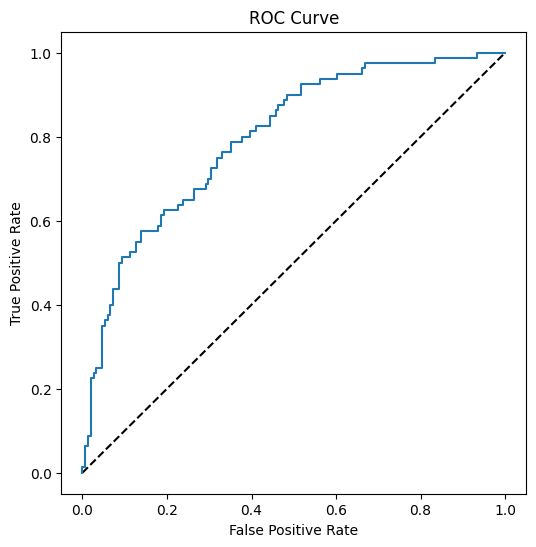

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [13]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.7976821192052981


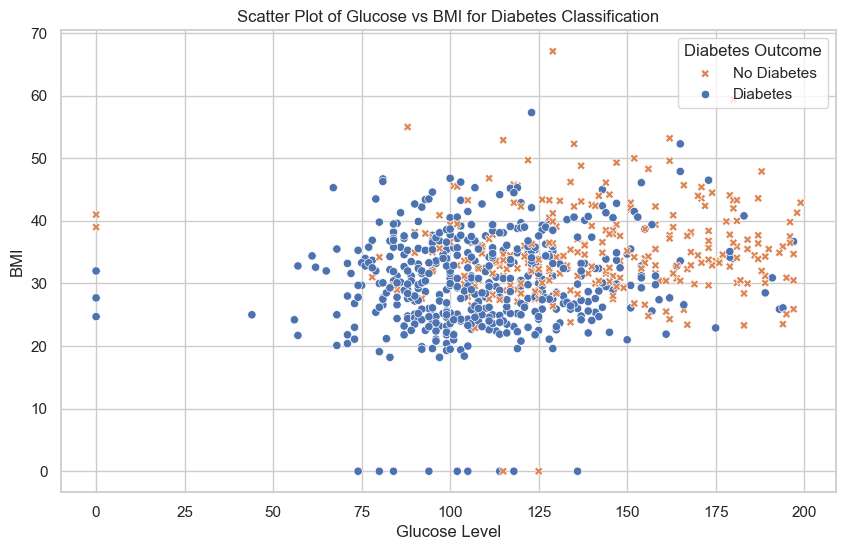

In [14]:
import matplotlib.pyplot as plt  
import seaborn as sns  

sns.set(style="whitegrid")  

plt.figure(figsize=(10, 6))  
sns.scatterplot(data=diabetes, x='Glucose', y='BMI', hue='Outcome', style='Outcome', palette='deep')  

plt.title('Scatter Plot of Glucose vs BMI for Diabetes Classification')  
plt.xlabel('Glucose Level')  
plt.ylabel('BMI')  
plt.legend(title='Diabetes Outcome', loc='upper right', labels=['No Diabetes', 'Diabetes'])  
plt.show()

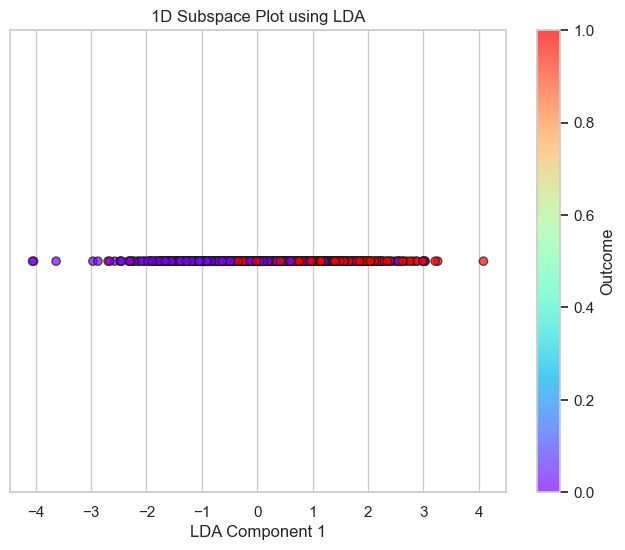

Class means in the LDA subspace:
[[  3.298      109.98        68.184       19.664       68.792
   30.3042       0.429734    31.19      ]
 [  4.86567164 141.25746269  70.82462687  22.1641791  100.3358209
   35.14253731   0.5505      37.06716418]]
Explained variance ratio (only for n_components > 1): [1.]


In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X_lda, np.zeros_like(X_lda), c=y, cmap='rainbow', alpha=0.7, edgecolors='k')
plt.title('1D Subspace Plot using LDA')
plt.xlabel('LDA Component 1')
plt.yticks([])  
plt.colorbar(label='Outcome')
plt.show()

print("Class means in the LDA subspace:")
print(lda.means_)

print("Explained variance ratio (only for n_components > 1):", lda.explained_variance_ratio_)